Data for:  setosa
Class1 mean 1545.630039136859  Class 2 mean 5706.297202878874
The threshold value is :  3625.963621007866
Error percentage :  0.0
Data for:  versicolor
Class1 mean 0.834266562220282  Class 2 mean 1.0381483291032922
The threshold value is :  0.936207445661787
Error percentage :  38.0
Data for:  virginica
Class1 mean -6.658995079769214  Class 2 mean -3.461431415486316
The threshold value is :  -5.0602132476277655
Error percentage :  18.000000000000004


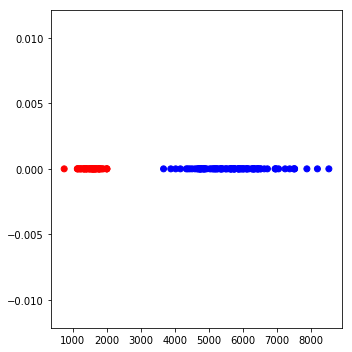

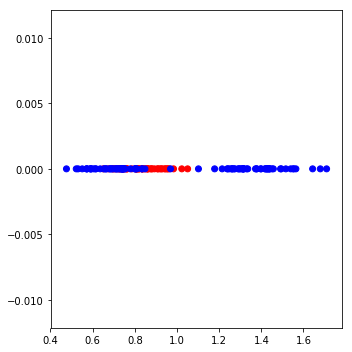

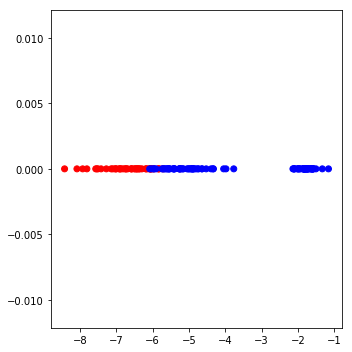

In [41]:
import pandas as pd
import numpy as np
import numpy.linalg as ln
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fname = 'iris.csv'

def plot_(name):
    print("Data for: ",name)
    label = []
    s = name
    df = pd.read_csv(fname)
    train = []
    for row in df.values:
        temp_row = []
        for item in row:
            if(type(item)==type('str')and item==s):
                temp_row.append(1.0)
            elif(type(item)==type('str') and item!=s):
                temp_row.append(-1.0)
            else:
                temp_row.append(item)
        train.append(temp_row)
    x = np.array(train)
    c1 = x[np.where(x[:,4]==1.)]
    c2 = x[np.where(x[:,4]==-1.)]
    mean = []
    mean.append(np.mean(c1[:,:4],axis=0))
    mean.append(np.mean(c2[:,:4],axis=0))
    overall_mean = (np.mean(x[:,:4],axis=0))
    sb  = np.outer((mean[1]-mean[0]),(mean[1]-mean[0]))
    sw = np.zeros((sb.shape[0],sb.shape[0]))
    def calculate_sw(c_data,s_w,mean):
        for row in c_data:
            x = row[:4]
            temp = np.outer(x-mean,x-mean)
            s_w = s_w+temp
            return s_w
    sw = calculate_sw(c1,sw,mean[0])
    sw = calculate_sw(c2,sw,mean[1])
    mat = np.dot(np.linalg.pinv(sw), sb)
    eigvals, eigvecs = np.linalg.eig(mat)
    eiglist = [(eigvals[i], eigvecs[:, i]) for i in range(len(eigvals))]
    eiglist = sorted(eiglist, key = lambda x : x[0], reverse = True)
    w = np.dot(np.linalg.pinv(sw), ((mean[1]-mean[0])))
    m1 = 0
    m2 =0
    data_plot = []
    x = []
    c = 0
    color = []
    c1_predict = []
    c2_predict = []
    for i in range(c1.shape[0]):
        temp = np.dot(c1[i,:4],w) 
        m1 += temp
        data_plot.append([temp])
        c +=1
        x.append(c)
        color.append('red')
    m1 = m1/50
    for i in range(c2.shape[0]):
        temp = np.dot(c2[i,:4],w)
        m2 +=temp
        data_plot.append([temp])
        c +=1
        x.append(c)
        color.append('blue')

    m2 = m2/100
    isLess = True
    if(m1>=m2):
        isLess = False
    fm = (m1+m2)/2
    for i in data_plot:
        if not isLess:
            if(i[0]>=fm):
                i.append(1)
            else:
                i.append(-1)
        else:
            if(i[0]<fm):
                i.append(1)
            else:
                i.append(-1)
    count = 0
    for i in range(50):
        if(c1[i,4]==data_plot[i][1]):
            count +=1
    for i in range(100):
        if(c2[i,4]==data_plot[50+i][1]):
            count +=1

    x1 = []
    for i in data_plot[:]:
        x1.append(i[0])
    xy_line = (0, 150)
    f,a = plt.subplots(figsize=(5,5))
    #a.scatter(x1,x,color=color)
    a.scatter(x1,np.zeros(len(x1)),color=color)
    #a.plot((fm,fm),xy_line, 'g--')
    plt.tight_layout()
    print("Class1 mean",m1," Class 2 mean",m2)
    print("The threshold value is : ",fm)
    print("Error percentage : ",str((1-(count/150))*100))
plot_('setosa')
plot_('versicolor')
plot_('virginica')